In [39]:
#importing the pandas lib
import pandas as pd

In [40]:
#reading the dataset which is frauddataset
df = pd.read_csv('/content/payment_fraud.csv')

In [41]:
#print the dataset
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0
1,725,1,4.742303,storecredit,0.000000,electronics,0.0,0
2,845,1,4.921318,creditcard,0.000000,food,1.0,0
3,503,1,4.886641,creditcard,0.000000,electronics,1.0,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0.0,0


In [42]:
#dataset having 3 independent var lable so we have to use lable encoding
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [52]:
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,1,28.204861,2,0.0,0
1,725,1,4.742303,2,0.000000,0,0.0,0
2,845,1,4.921318,0,0.000000,1,1.0,0
3,503,1,4.886641,0,0.000000,0,1.0,0
4,2000,1,5.040929,0,0.000000,2,0.0,0


In [53]:
X = df.drop('paymentMethod',axis=1)
y = df['paymentMethod']

In [54]:
from sklearn.model_selection import train_test_split


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [57]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy Score:", acc)


Accuracy Score: 0.6363288718929254


In [58]:
# Example: real-time input (replace with actual values)
new_data = pd.DataFrame([{
    "accountAgeDays": 300,"numItems": 2,"localTime": 14.5,"paymentMethodAgeDays": 100.0,"Category": label_encoders["Category"].transform(["shopping"])[0],
    "isWeekend": 0.0, "label": 0
}])

# Make prediction
prediction = clf.predict(new_data)[0]

# Interpret result
if prediction == 1:
    print("🚨 Fraudulent transaction detected!")
else:
    print("✅ Transaction is legitimate.")

✅ Transaction is legitimate.


In [59]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.85      0.77      5550
           1       0.25      0.13      0.17      1912
           2       0.05      0.02      0.03       383

    accuracy                           0.64      7845
   macro avg       0.33      0.33      0.32      7845
weighted avg       0.56      0.64      0.59      7845

Confusion Matrix:
[[4734  716  100]
 [1627  251   34]
 [ 327   49    7]]


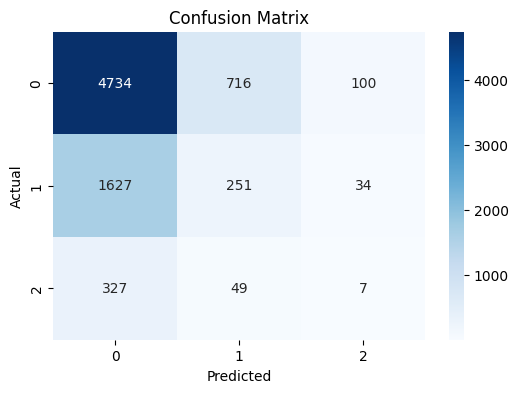

In [60]:
# Plot confusion matrix heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
